In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
class MNK_info:
    def __init__ (self, k = 0, b = 0, sigma_k = 0, sigma_b = 0):
        self.k = k
        self.b = b
        self.sigma_k = sigma_k
        self.sigma_b = sigma_b

    def Print (self):
        print ("\t" + "k = " + str (self.k),
               "\t" + "b = " + str (self.b),
               "\t" + "sigma_k = " + str (self.sigma_k),
               "\t" + "sigma_b = " + str (self.sigma_b),
               sep = "\n")

def MNK (x, y):
    mid = lambda mass: sum (mass) / len (mass)

    # y = k * x + b
    mid_xy = [x[i] * y[i] for i in range (len (x))]
    mid_xy = mid (mid_xy)

    mid_x_pow2 = [x_i ** 2 for x_i in x]
    mid_x_pow2 = mid (mid_x_pow2)

    mid_y_pow2 = [y_i ** 2 for y_i in y]
    mid_y_pow2 = mid (mid_y_pow2)

    mid_y = mid (y)
    mid_x = mid (x)

    k = (mid_xy - mid_x * mid_y ) / (mid_x_pow2 - mid_x ** 2)
    b = mid_y - k * mid_x

    sigma_k = 1 / np.sqrt (len  (x)) * np.sqrt ((mid_y_pow2 - mid_y ** 2) / (mid_x_pow2 - mid_x ** 2) - k ** 2)
    sigma_b = sigma_k * np.sqrt (mid_x_pow2 - mid_x ** 2)

    return MNK_info (k, b, sigma_k, sigma_b)

In [24]:
list(map(float, " 10.0 & 12.0 & 14.0 & 16.0 & 18.0 & 20.0 & 25.0 & 15.0 & 15.5 & 16.5 & 17.0 & 17.5 & 18.5 & 19.0 & 19.5 ".split("&")))

[10.0,
 12.0,
 14.0,
 16.0,
 18.0,
 20.0,
 25.0,
 15.0,
 15.5,
 16.5,
 17.0,
 17.5,
 18.5,
 19.0,
 19.5]

# Счетчик гейгера

In [29]:
t_gei = np.array ([70.218, 40.162, 40.212, 44.857, 76.341, 125.074, 120.178, 40.209, 40.206, 40.206, 40.584, 51.685, 119.884, 119.975, 120.123])
N_gei = np.array ([907, 657, 603, 612, 506, 42, 26, 581, 568, 544, 505, 502, 339, 108, 47])
d_gei = np.array ([10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 25.0, 15.0, 15.5, 16.5, 17.0, 17.5, 18.5, 19.0, 19.5])


In [30]:

N_div_T_gei = N_gei / t_gei

# Сортируем, т.к. не по порядку

sorting_arr = zip (N_div_T_gei, d_gei)
sorting_arr = sorted (sorting_arr, key = lambda x: x[1])
N_div_T_gei, d_gei = zip (*sorting_arr)

# вычматы style, см. https://github.com/AndreyVV-100/Computational-Mathematics/tree/main/Sem1-Task1
diff_N_x = [-(N_div_T_gei[1] - N_div_T_gei[0]) / (d_gei[1] - d_gei[0])] # 0th elem
# [1; N-2]
diff_N_x += [-(N_div_T_gei[i_elem + 1] - N_div_T_gei[i_elem - 1]) / (d_gei[i_elem + 1] - d_gei[i_elem - 1]) for i_elem in range (1, len (d_gei) - 1)]
diff_N_x += [-(N_div_T_gei[-1] - N_div_T_gei[-2]) / (d_gei[-1] - d_gei[-2])] # (N-1)th elem

# Теперь прямая для Rэ, промежутки сами ищите

seg_d_geig = d_gei[6:12]
seg_N_geig = N_div_T_gei[6:12]

geig_MNK = MNK (seg_d_geig, seg_N_geig)
R_e_geig = -geig_MNK.b / geig_MNK.k
delta_R_e_geig = R_e_geig * np.sqrt ((geig_MNK.sigma_b / geig_MNK.b) ** 2 + (geig_MNK.sigma_k / geig_MNK.k) ** 2)
print ("Rэ = ", R_e_geig, " +- ", delta_R_e_geig)

Rэ =  19.162364029644273  +-  1.0922499388067508


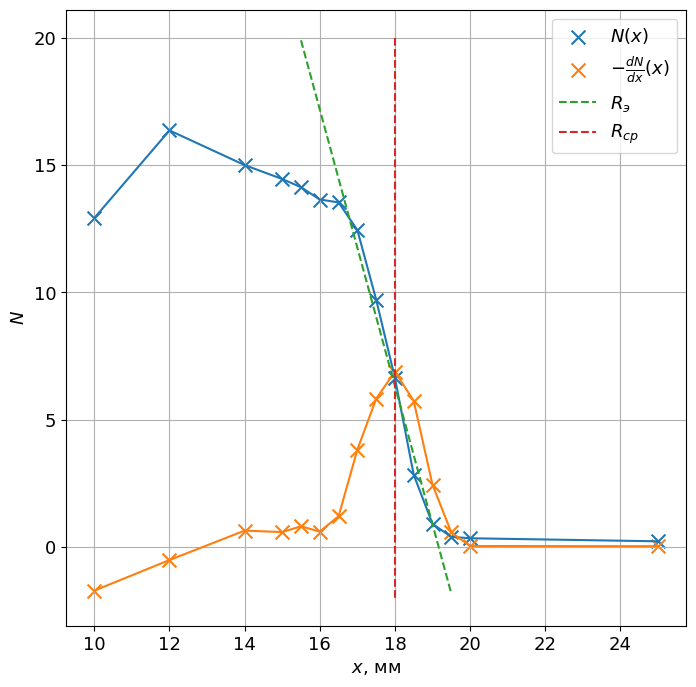

In [42]:
plt.rc('font', size = 13)

fig = plt.figure(figsize = (8, 8))
ax  = fig.add_subplot(1,1,1)

ax.scatter (d_gei, N_div_T_gei, marker = 'x', s=100, label = "$N(x)$")
ax.plot (d_gei, N_div_T_gei)

ax.scatter (d_gei, diff_N_x, marker = 'x', s=100, label = "$-\\frac{dN}{dx}(x)$")
ax.plot (d_gei, diff_N_x)

# Подбирайте точки сами для Rэ
# Интересно, для кого я пишу это в три часа ночи? Напиши, если реально читаешь это.
linear = lambda x: geig_MNK.k * x + geig_MNK.b
ax.plot ([d_gei[4], d_gei[12]], [linear (d_gei[4]), linear (d_gei[12])], "--", label = "$R_э$")

# Rcр
ax.plot ([18, 18], [20, -2], "--", label = "$R_{ср}$") # тут я уже совсем обнаглел

ax.set_xlabel ('$x$, мм')
ax.set_ylabel ('$N$')

plt.legend()
ax.grid(True)

plt.savefig ("geiger.png")
plt.show()

# Сцинтилляционный счетчик


In [136]:
p_atm = 750
p_sc = p_atm - np.array ([740, 730, 720, 710, 700, 675, 650, 625, 600, 575, 550, 525, 500, 475, 450, 425, 560, 540, 510, 490, 460, 440, 410])
N_sc = np.array ([3601, 3455, 3344, 3314, 2975, 2714, 2233, 1774, 1242, 717, 409, 180, 93, 64, 16, 3, 680, 294, 119, 87, 59, 7, 5])
t_sc = np.array ([10] * len(N_sc))

N_div_T_sc = N_sc / p_sc

In [137]:
print(*p_sc[:12], sep=" & ", end="\\\ \\hline\n")
print(*N_sc[:12], sep=" & ", end="\\\ \\hline\n")
print(*t_sc[:12], sep=" & ", end="\\\ \\hline\n")

10 & 20 & 30 & 40 & 50 & 75 & 100 & 125 & 150 & 175 & 200 & 225\\ \hline
3601 & 3455 & 3344 & 3314 & 2975 & 2714 & 2233 & 1774 & 1242 & 717 & 409 & 180\\ \hline
10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10\\ \hline


In [138]:
print(*p_sc[12:], sep=" & ", end="\\\ \\hline\n")
print(*N_sc[12:], sep=" & ", end="\\\ \\hline\n")
print(*t_sc[12:], sep=" & ", end="\\\ \\hline\n")

250 & 275 & 300 & 325 & 190 & 210 & 240 & 260 & 290 & 310 & 340\\ \hline
93 & 64 & 16 & 3 & 680 & 294 & 119 & 87 & 59 & 7 & 5\\ \hline
10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10 & 10\\ \hline


In [139]:
np.abs(p_sc - 50).argmin()

4

In [153]:
# Сортируем, т.к. не по порядку

sorting_arr = zip (N_div_T_sc, p_sc)
sorting_arr = sorted (sorting_arr, key = lambda x: x[1])
N_div_T_sc, p_sc = zip (*sorting_arr)

# вычматы style, см. https://github.com/AndreyVV-100/Computational-Mathematics/tree/main/Sem1-Task1
diff_N_p = [-120*(N_div_T_sc[1] - N_div_T_sc[0]) / (p_sc[1] - p_sc[0])] # 0th elem
# [1; N-2]
diff_N_p += [-120*(N_div_T_sc[i_elem + 1] - N_div_T_sc[i_elem - 1]) / (p_sc[i_elem + 1] - p_sc[i_elem - 1]) for i_elem in range (1, len (p_sc) - 1)]
diff_N_p += [-120*(N_div_T_sc[-1] - N_div_T_sc[-2]) / (p_sc[-1] - p_sc[-2])] # (N-1)th elem

# Теперь прямая для Rэ, промежутки сами ищите

seg_p_sc = p_sc[0:4]
seg_N_sc = N_div_T_sc[0:4]

sc_MNK = MNK (seg_p_sc, seg_N_sc)
p_e_sc = -sc_MNK.b / sc_MNK.k
delta_p_e_sc = p_e_sc * np.sqrt ((sc_MNK.sigma_b / sc_MNK.b) ** 2 + (sc_MNK.sigma_k / sc_MNK.k) ** 2)
print ("pэ = ", p_e_sc, " +- ", delta_p_e_sc)

pэ =  45.35664962114143  +-  9.599395523126365


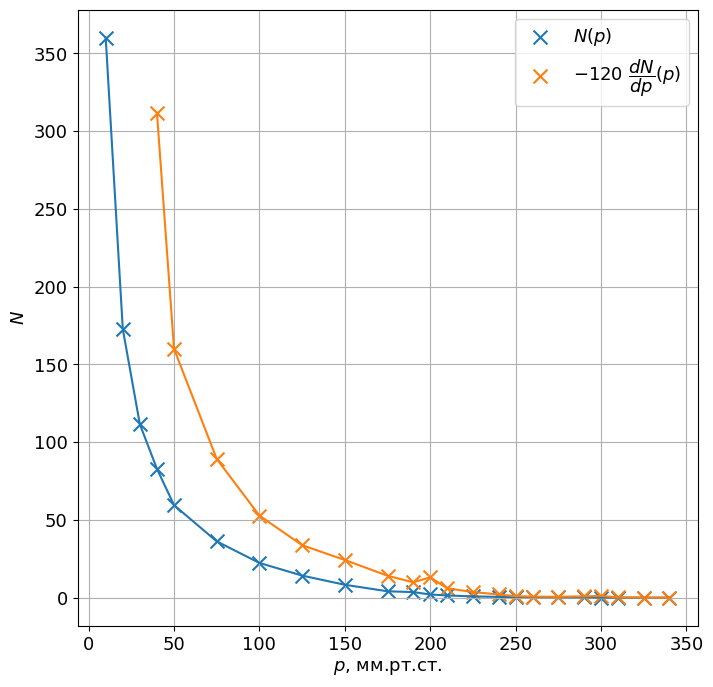

In [160]:

fig = plt.figure(figsize = (8, 8))
ax  = fig.add_subplot(1,1,1)

# Почему такой промежуток? А знаете почему? Думаете, что у нас руки кривые?
# Нет, просто опыт - говно! А мы пытаемся из него сделать что-то интересное, но у нас не получается!
ax.scatter (p_sc, N_div_T_sc, marker = 'x', s=100, label = "$N (p)$")
ax.plot (p_sc, N_div_T_sc)

ax.scatter (p_sc[3:], diff_N_p[3:], marker = 'x', s=100, label = "$-120~ \\dfrac{dN}{dp} (p)$")
ax.plot (p_sc[3:], diff_N_p[3:])

# pэ
# linear = lambda x: sc_MNK.k * x + sc_MNK.b
# ax.plot ([p_sc[0], p_sc[4]], [linear (p_sc[0]), linear (p_sc[4])], "--", label = "$R_э$", color = "green")

# p cр
# ax.plot ([147, 147], [400, -2], "--", label = "$R_{ср}$", color = "red") # тут я уже совсем обнаглел

ax.set_xlabel ('$p$, мм.рт.ст.')
ax.set_ylabel ('$N$')

plt.legend()
ax.grid(True)

plt.savefig ("sc.png")
plt.show()

In [115]:
p_atm = 750
I_ion = np.array ([25, 55, 92, 125, 166, 203, 242, 274, 322, 362, 408, 450, 492, 538, 585, 630, 685, 725, 778, 826, 875, 900, 914, 916, 915, 908, 906, 897, 891, 890])
p_ion = p_atm - np.array ([720, 700, 675, 650, 625, 600, 572, 550, 525, 500, 475, 450, 425, 400, 375, 350, 325, 300, 275, 250, 220, 200, 175, 150, 125, 100, 75, 50, 25, 0])


In [116]:
print(*I_ion[:10], sep=" & ", end="\\\ \\hline\n")
print(*p_ion[:10], sep=" & ", end="\\\ \\hline\n")

25 & 55 & 92 & 125 & 166 & 203 & 242 & 274 & 322 & 362\\ \hline
30 & 50 & 75 & 100 & 125 & 150 & 178 & 200 & 225 & 250\\ \hline


In [117]:
print(*I_ion[10:19], sep=" & ", end="\\\ \\hline\n")
print(*p_ion[10:19], sep=" & ", end="\\\ \\hline\n")

408 & 450 & 492 & 538 & 585 & 630 & 685 & 725 & 778\\ \hline
275 & 300 & 325 & 350 & 375 & 400 & 425 & 450 & 475\\ \hline


In [118]:
print(*I_ion[19:], sep=" & ", end="\\\ \\hline\n")
print(*p_ion[19:], sep=" & ", end="\\\ \\hline\n")

826 & 875 & 900 & 914 & 916 & 915 & 908 & 906 & 897 & 891 & 890\\ \hline
500 & 530 & 550 & 575 & 600 & 625 & 650 & 675 & 700 & 725 & 750\\ \hline


In [119]:
np.abs(p_ion - 600).argmin()

23

In [120]:
# Сортируем, т.к. не по порядку

sorting_arr = zip (I_ion, p_ion)
sorting_arr = sorted (sorting_arr, key = lambda x: x[1])
I_ion, p_ion = zip (*sorting_arr)

seg_I_ion1 = I_ion[:23]
seg_p_ion1 = p_ion[:23]
ion1_MNK = MNK (seg_p_ion1, seg_I_ion1)

seg_I_ion2 = I_ion[23:]
seg_p_ion2 = p_ion[23:]
ion2_MNK = MNK (seg_p_ion2, seg_I_ion2)

p_cross_ion = - (ion1_MNK.b - ion2_MNK.b) / (ion1_MNK.k - ion2_MNK.k)
delta_p_ion = p_cross_ion * np.sqrt (((ion1_MNK.sigma_b + ion2_MNK.sigma_b)/(ion1_MNK.b - ion2_MNK.b)) ** 2 +((ion1_MNK.sigma_k + ion2_MNK.sigma_k)/(ion1_MNK.k - ion2_MNK.k)) ** 2)
print ("p_cross_ion = ", p_cross_ion, " +- ", delta_p_ion)


p_cross_ion =  569.8045816324702  +-  9.628074373727879


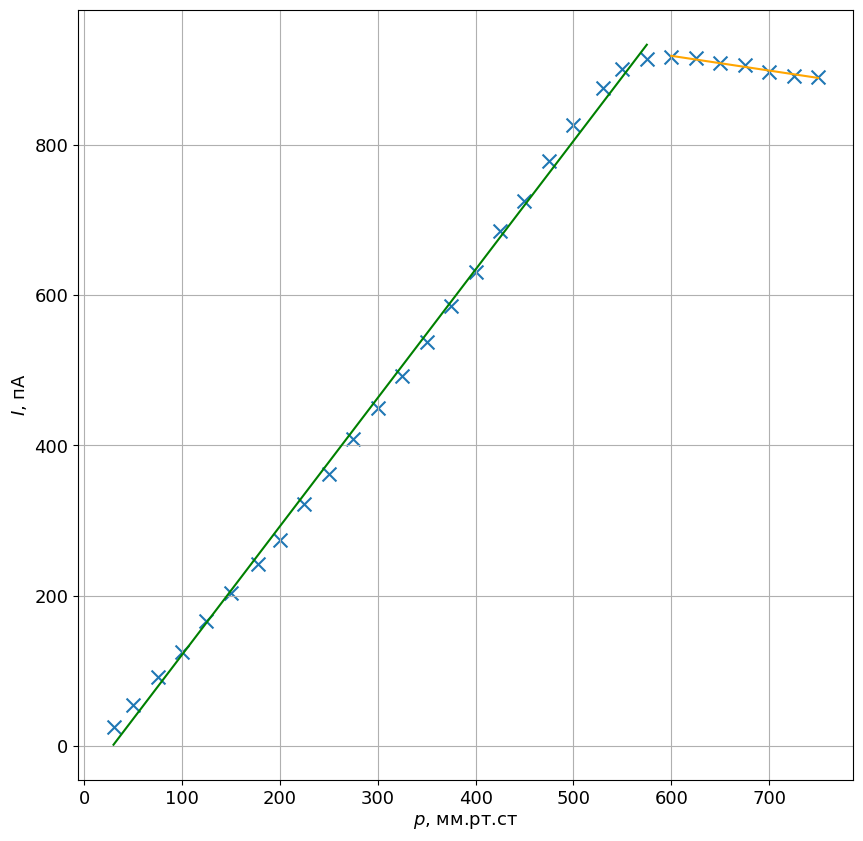

In [125]:

fig = plt.figure(figsize = (10, 10))
ax  = fig.add_subplot(1,1,1)

ax.scatter (p_ion, I_ion, marker = 'x', s=100)
# ax.plot (p_ion, I_ion)

linear = lambda x: ion1_MNK.k * x + ion1_MNK.b
ax.plot ([p_ion[0], p_ion[22]], [linear (p_ion[0]), linear (p_ion[22])], color = "green")

linear = lambda x: ion2_MNK.k * x + ion2_MNK.b
ax.plot ([p_ion[-1], p_ion[23]], [linear (p_ion[-1]), linear (p_ion[23])], color = "orange")

ax.set_xlabel ('$p$, мм.рт.ст',)
ax.set_ylabel ('$I$, пА', )

# plt.legend(fontsize = 20)
ax.grid(True)

plt.savefig ("ion.png")